Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Decision Tree with PCA: 0.97
Explained Variance Ratios by PCA Components: [0.86129274 0.07496935]
Confusion Matrix:
[[ 71   0   6]
 [  0 129   0]
 [  1   1 110]]


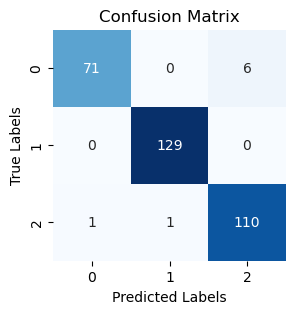

     Class  Precision    Recall  F1 Score
0  Class 1   0.986111  0.922078  0.953020
1  Class 2   0.992308  1.000000  0.996139
2  Class 3   0.948276  0.982143  0.964912


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'c:\python\milknew.csv')
#print(data.head())
#print(data)
# print(data.shape)
#data.info()
#print(data.describe().T)
data['Grade'].unique()
data.isnull().sum()
# plt.figure(figsize=(7, 3))
# data.boxplot()

# Skewness Reduction: Apply Robust Scaling to handle outliers
from sklearn.preprocessing import RobustScaler, LabelEncoder
scaler = RobustScaler()
data[['Temprature', 'Colour', 'pH']] = scaler.fit_transform(data[['Temprature', 'Colour', 'pH']])

#print(ph)

# plt.figure(figsize=(7, 3))
# data.boxplot()

from sklearn import preprocessing
from sklearn.decomposition import PCA
label_encoder = preprocessing.LabelEncoder()
data['Grade']= label_encoder.fit_transform(data['Grade'])
data['Grade'].unique()
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

X=data.drop(['Grade'],axis=1)
y=data['Grade']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=143)

# Apply PCA with 90% variance retention
pca = PCA(0.90)

# Fit PCA on the training data and transform both train and test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 3:Train Decision Tree Classifier with optimized pruning
# clf = DecisionTreeClassifier(max_depth=8, min_samples_split=5, min_samples_leaf=3, class_weight="balanced", random_state=143)
# clf.fit(X_train_pca, y_train)

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=143), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)
clf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Step 4: Predict on the test data
y_pred = clf.predict(X_test_pca)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree with PCA: {accuracy:.2f}")

# Optionally, print PCA explained variance ratios
print("Explained Variance Ratios by PCA Components:", pca.explained_variance_ratio_)


def calculate_metrics(confusion_matrix):
    # Initialize lists to store precision, recall, and F1 score for each class
    precision = []
    recall = []
    f1_score = []
    
    # Calculate metrics for each class
    num_classes = confusion_matrix.shape[0]
    for i in range(num_classes):
        # True Positives (TP) for the class
        TP = confusion_matrix[i, i]
        
        # False Positives (FP) for the class
        FP = np.sum(confusion_matrix[:, i]) - TP
        
        # False Negatives (FN) for the class
        FN = np.sum(confusion_matrix[i, :]) - TP
        
        # True Negatives (TN) for the class
        TN = np.sum(confusion_matrix) - (TP + FP + FN)
        
        # Precision, Recall, and F1 Score for the class
        class_precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        class_recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        class_f1 = 2 * (class_precision * class_recall) / (class_precision + class_recall) if (class_precision + class_recall) > 0 else 0
        
        # Append results to lists
        precision.append(class_precision)
        recall.append(class_recall)
        f1_score.append(class_f1)
    
   # Create a DataFrame for displaying in table format
    metrics_df = pd.DataFrame({
        "Class": [f"Class {i+1}" for i in range(num_classes)],
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score
    })
    
    return metrics_df


#Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Call the function and print the results
metrics = calculate_metrics(conf_matrix)
print(metrics)




